### NEE calculated using USTAR CUT / VUT thresholds for USNE-1 maize-soybean site
#### Years 2015 - 2021

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing
import seaborn as sns
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from data_loader import load_datasets, nee_cumulative_to_daily, to_pd

In [2]:
target = 'NEE'
observed_df = pd.read_csv('datasets/extractedNEE_CUT_REF_NIGHT_Final'  + '.csv')

In [3]:
dirs = ['warm_temp_maize_soybean_irrigated', 'warm_temp_maize-soybean_dryland', 'cool_temp_maize_soybean']

datasets = load_datasets(dirs, '/csv_outs/with_plant_soil_details/')

df_dry = nee_cumulative_to_daily(to_pd(datasets['warm_temp_maize-soybean_dryland'], True, True))
df_irr = nee_cumulative_to_daily(to_pd(datasets['warm_temp_maize_soybean_irrigated'], True, True))
df_cool = nee_cumulative_to_daily(to_pd(datasets['cool_temp_maize_soybean'], True, True))

df = pd.concat([df_dry,df_irr, df_cool])

y = df[target].copy()

### NEE calculated using PR ecosys , (Gross primary production - Ecosystem respiration)

In [4]:
def plot_against_time(eco_nee : pd.Series, obs_nee : pd.Series, title: str = 'NEE by time of the year' , xlabel: str = 'Simulated' , ylabel: str = 'Measured'):
    dates = np.arange(0, len(eco_nee))

    # Define the two NEE datasets
    nee_procedural = eco_nee
    nee_eddy_covariance = obs_nee

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(dates, nee_procedural, label= xlabel, color='blue')
    ax.plot(dates, nee_eddy_covariance, label= ylabel, color='red')

    # Add axis labels and legend
    ax.set_xlabel('Samples')
    ax.set_ylabel('NEE g C m-2 day-1')
    ax.set_title(title)
    ax.legend()

    # Show the plot
    plt.show()

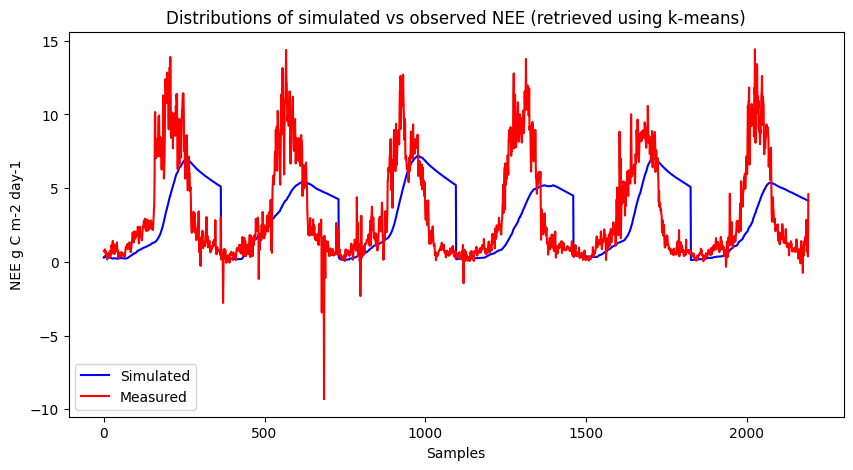

In [5]:
plot_against_time(df_irr['NEE'][:2192], observed_df['NEE'],  'Distributions of simulated vs observed NEE (retrieved using k-means)')

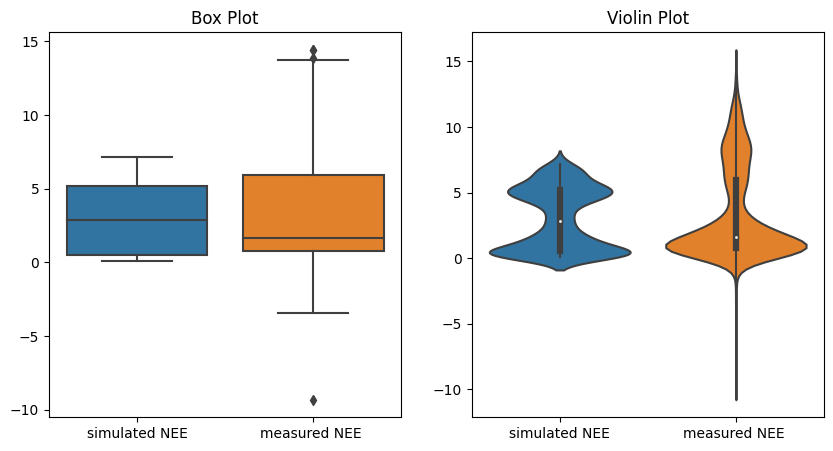

In [6]:
dat = pd.DataFrame({'simulated NEE' : df_irr['NEE'][:2192], 'measured NEE ' : observed_df['NEE']})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Create a box plot on the left subplot
sns.boxplot(data=dat, ax=ax1)
ax1.set_title('Box Plot')

# Create a violin plot on the right subplot
sns.violinplot(data=dat, ax=ax2)
ax2.set_title('Violin Plot')

# Show the figure
plt.show()

In [7]:
observed_df['initial planting density (m-2)1'] = 8.2
observed_df['DOY'] = observed_df['DOY'].astype(int)
xgbFeatImp = pd.read_csv('feature_analysis/xgboost/FeaturesImportance'  + target  + 'weather_soil_data' + '.csv')
feat_cols = []
for i in range(len(xgbFeatImp.values)):
    feat_cols.append(xgbFeatImp.values[i][0])


feat_cols.append('YEAR')

In [9]:
df

,DATE,DOY,SOIL_CO2_FLUX,ECO_CO2_FLUX,CH4_FLUX,O2_FLUX,CO2_LIT,O2_LIT,H_EVAPN,H_RUNOFF,...,EMERGENCE,END_SEED_FILL,FLORAL_INIT.,JOINTING,NOT_ALIVE,SEED_FILL,SEED_MASS_SET,SEED_NO._SET,NEE,PLANTING
0,2015-01-01,1,-0.255585,-0.255585,0.000761,0.276700,370.324575,15.367582,-0.000728,0.0,...,0,0,0,0,1,0,0,0,0.236561,NaN
1,2015-01-02,2,-0.241709,-0.241709,0.000744,-0.168380,370.360742,15.798648,-0.009315,0.0,...,0,0,0,0,1,0,0,0,0.229185,NaN
2,2015-01-03,3,-0.272869,-0.272869,0.000786,-0.006056,370.420192,14.854394,-0.009618,0.0,...,0,0,0,0,1,0,0,0,0.239400,NaN
3,2015-01-04,4,-0.649682,-0.649682,0.000937,0.387433,370.668192,14.012000,-0.004694,0.0,...,0,0,0,0,1,0,0,0,0.328765,NaN
4,2015-01-05,5,-0.315353,-0.315353,0.000760,0.391184,370.359367,15.584626,-0.000703,0.0,...,0,0,0,0,1,0,0,0,0.318535,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,361,-0.475121,-0.475121,0.000298,0.412722,360.741696,15.299666,0.001420,0.0,...,0,0,0,0,1,0,0,0,4.372799,0.0
2918,2022-12-28,362,-0.482619,-0.482619,0.000296,0.653159,360.727604,15.049338,-0.000560,0.0,...,0,0,0,0,1,0,0,0,4.362091,0.0
2919,2022-12-29,363,-0.463160,-0.463160,0.000293,0.377447,360.784450,15.356356,0.008237,0.0,...,0,0,0,0,1,0,0,0,4.351364,0.0
2920,2022-12-30,364,-0.476328,-0.476328,0.000299,0.924370,360.285500,15.917075,-0.001439,0.0,...,0,0,0,0,1,0,0,0,4.340683,0.0


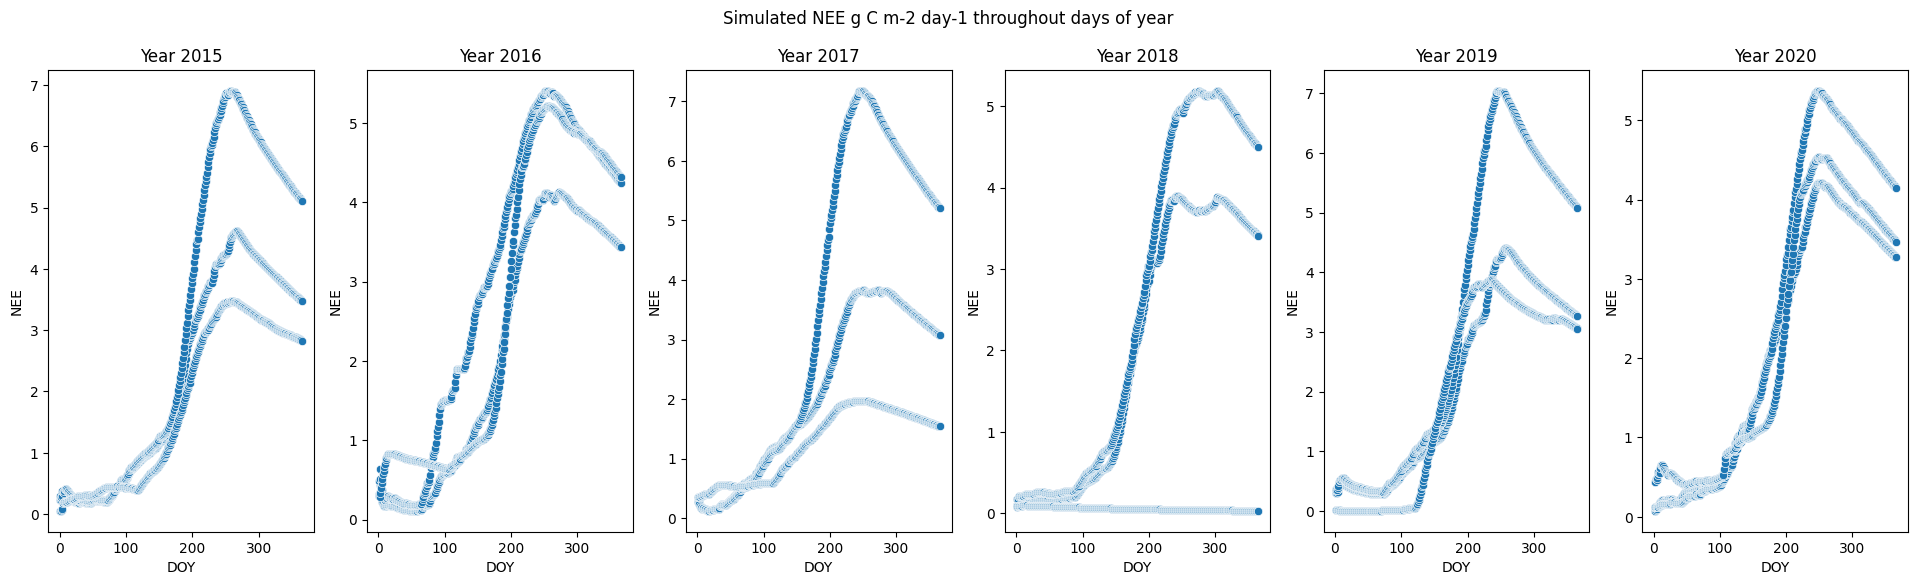

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
strt_yr = 2015

yrs = 6

# Create a figure with subplots
fig, axs = plt.subplots(1, yrs, figsize=(4*yrs, 6))
for i in range(6): 
    cur = df.loc[df['DATE'].dt.year == strt_yr]
    
    
    
    plt.figure()
    # Plot each line with different color and label
    sns.scatterplot(x=cur['DOY'], y=cur['NEE'], ax=axs[i],  alpha=1)
    axs[i].set_title(f'Year {strt_yr}')
    
    strt_yr += 1
fig.suptitle('Simulated NEE g C m-2 day-1 throughout days of year')

plt.subplots_adjust(wspace=0.3)

plt.show()

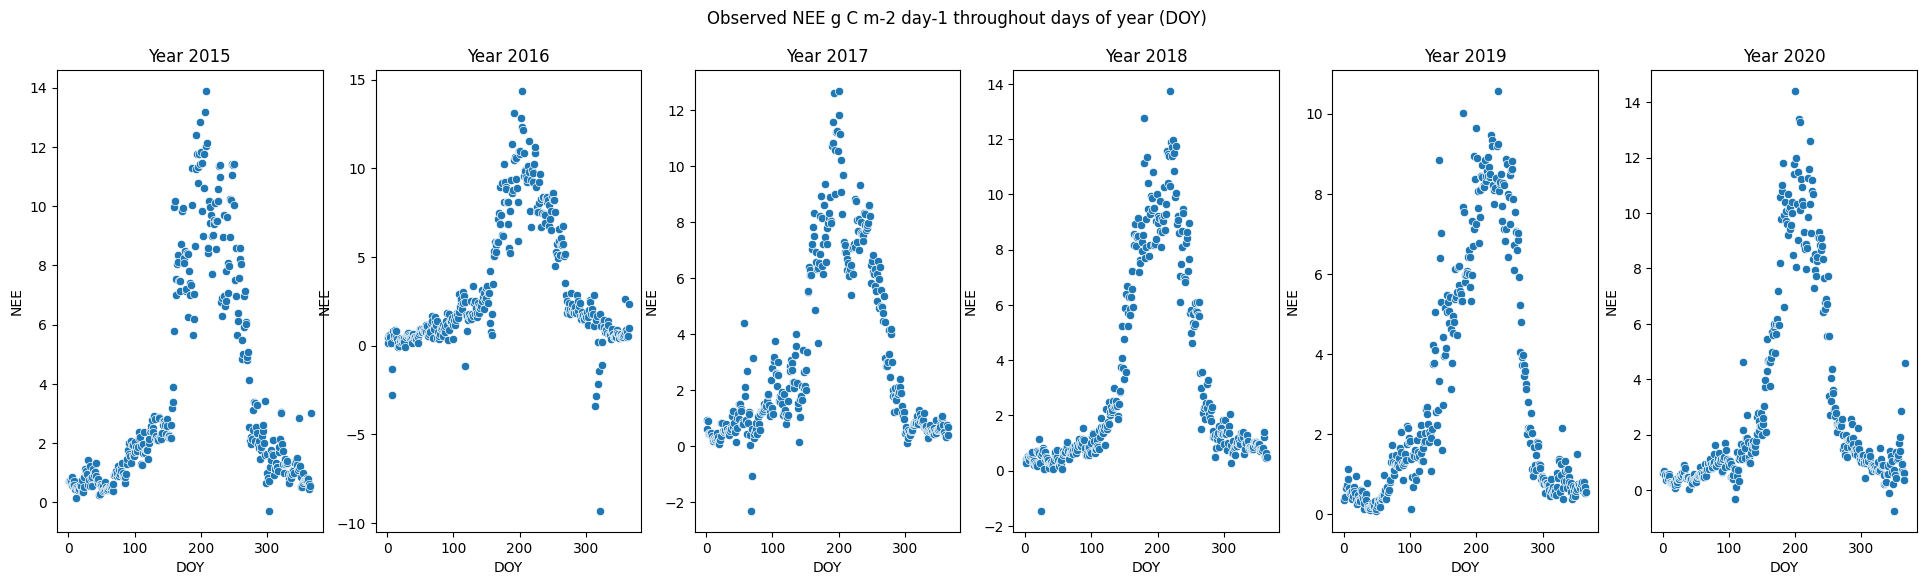

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
strt_yr = 2015
observed_df['DATE']= pd.to_datetime(observed_df['DATE'])
yrs = 6
# Create a figure with subplots
fig, axs = plt.subplots(1, yrs, figsize=(4*yrs, 6))
for i in range(6): 
    cur = observed_df.loc[observed_df['DATE'].dt.year == strt_yr]
    
    
    
    plt.figure()
    plt.tight_layout()
    sns.scatterplot(x=cur['DOY'], y=cur['NEE'], ax=axs[i],  alpha=1)
    axs[i].set_title(f'Year {strt_yr}')
    
    strt_yr += 1
    

fig.suptitle('Observed NEE g C m-2 day-1 throughout days of year (DOY)')

plt.subplots_adjust(wspace=0.2)

plt.show()


In [18]:
df_with_observed['NEE'].mean()

2.536670095795672

In [19]:
df['NEE'].mean()

2.3447075409227667

In [25]:
season_map = {
1 :'WINTER' ,
2:'SPRING',
3:'SUMMER',
4:'AUTUMN'
}

df_with_observed = pd.concat([df, observed_df])


df_with_observed['SEASON'] = df_with_observed['DATE'].dt.month%12 // 3 + 1
df_with_observed['SEASON'] =df_with_observed['SEASON'].map(season_map)

In [22]:



df['SEASON'] = df['DATE'].dt.month%12 // 3 + 1
df['SEASON'] =df['SEASON'].map(season_map)

In [23]:
grouped_df = df.groupby('SEASON')['NEE']

season_means = grouped_df.mean()

In [24]:
season_means

SEASON
AUTUMN    4.314248
SPRING    0.696710
SUMMER    2.887943
WINTER    1.484983
Name: NEE, dtype: float64

Text(0.5, 1.0, 'NEE  g C m-2 day-1 over seasons 2015 - 2022 ')

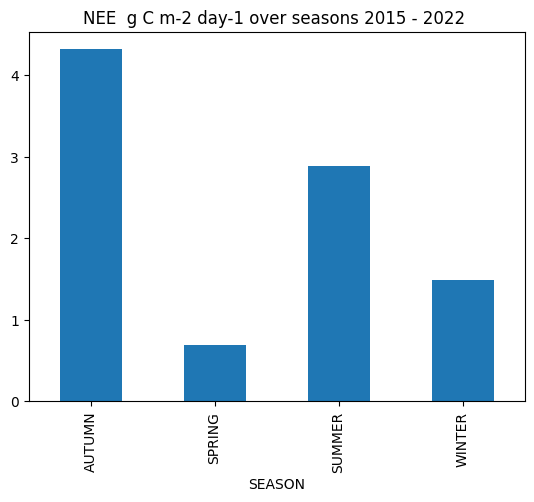

In [28]:
grouped_df = df_with_observed.groupby('SEASON')['NEE']

# Calculate the mean NEE for each season
season_means = grouped_df.mean()

season_means.plot(x= 'SEASON' , y = 'NEE' , kind='bar')
plt.title("NEE  g C m-2 day-1 over seasons 2015 - 2022 ")

In [29]:
season_means

SEASON
AUTUMN    4.314248
SPRING    0.696710
SUMMER    2.887943
WINTER    1.484983
Name: NEE, dtype: float64

In [15]:
grouped_df

Text(0.5, 1.0, 'NEE  g C m-2 day-1 over seasons 2015 - 2022 ')

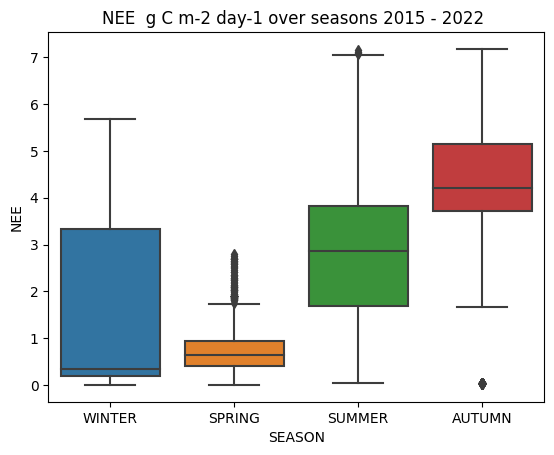

In [30]:
# Plot the NEE values for each season
sns.boxplot(x='SEASON', y='NEE', data=df_with_observed[ ['SEASON', 'NEE' ] ])
plt.title("NEE  g C m-2 day-1 over seasons 2015 - 2022 ")